# 주의사항
제출 사이트: https://www.kaggle.com/c/titanic
<br>
<br>
Kaggle 사이트 제출 횟수에 제한이 있으므로 아무 방법이나 선택하여 적용하지 말고, 강의 시간 때 들었던 내용을 토대로 어떤 알고리즘이 좋을지 생각하여 적용시키기 바랍니다. 실제 점수도 중요하지만 해당 알고리즘을 적용해본 근거가 충분하면 높은 점수를 드릴 예정입니다.

In [1]:
# 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

C:\ProgramData\Anaconda3\envs\ai\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


직접 preprocessing 과정을 결정하여 아래에 코드 작성

In [2]:
# Preprocessing
preprocessing_train_data = pd.read_csv('data/train.csv');
preprocessing_test_data = pd.read_csv('data/test.csv');

#직접 preprocessing 결정하여 코드 완성
############################################################
# "Name", "Ticket", "Cabin" 정보 제거
preprocessing_train_data.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
preprocessing_test_data.drop(['Name', 'Ticket', 'Cabin','Embarked'], axis=1, inplace=True)

# "SibSp"와 "Parch" 정보를 합쳐 "FamilySize" 생성
preprocessing_train_data['FamilySize'] = preprocessing_train_data['SibSp'] + preprocessing_train_data['Parch']  
preprocessing_test_data['FamilySize'] = preprocessing_test_data['SibSp'] + preprocessing_test_data['Parch'] 

# "SibSp"와 "Parch" 제거
preprocessing_train_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)
preprocessing_test_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

# "Sex" vectorization
preprocessing_train_data.replace(['female', 'male'], [0, 1], inplace=True)
preprocessing_test_data.replace(['female', 'male'], [0, 1], inplace=True)

# 비워진 데이터 '0'으로 채우기
preprocessing_train_data.fillna(0)
preprocessing_test_data.fillna(0)
preprocessing_train_data['Age'].replace([None], [0], inplace=True)  
preprocessing_test_data['Age'].replace([None], [0], inplace=True)

# Age 를 대신할 AgeBand 컬럼 생성 10살 단위로 자름.
preprocessing_train_data.loc[preprocessing_train_data['Age'] <= 10, 'AgeBand'] = 0
preprocessing_test_data.loc[preprocessing_test_data['Age'] <= 10, 'AgeBand'] = 0
for i in range(1,8):
#     print(i)
    preprocessing_train_data.loc[preprocessing_train_data['Age'] > i*10, 'AgeBand'] = i
    preprocessing_test_data.loc[preprocessing_test_data['Age'] > i*10, 'AgeBand'] = i

preprocessing_train_data.drop(['Age'], axis=1, inplace=True)
preprocessing_test_data.drop(['Age'], axis=1, inplace=True)
############################################################

위 preprocessing 결과를 바탕으로 제시한 5가지 알고리즘 적용

In [3]:
# training을 위한 데이터 생성
X_train = preprocessing_train_data.drop(['Survived', 'PassengerId'], axis=1)
Y_train = preprocessing_train_data["Survived"]
X_test = preprocessing_test_data.drop(['PassengerId'], axis=1)

Accuracy:  95.29
Area Under the Curve:  0.99


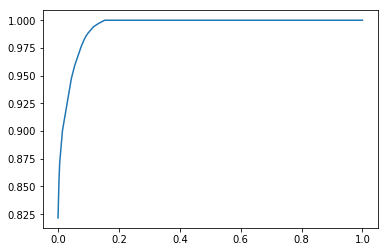

In [4]:
# 알고리즘 선택, 사용하고 싶은 알고리즘을 classifier로 지정하여 사용
classifier = KNeighborsClassifier()
classifier = LogisticRegression()
classifier = SVC(probability=True)
classifier = DecisionTreeClassifier()
# classifier = RandomForestClassifier()
# classifier = GaussianNB()

# 위에서 설정한 classifier의 accuracy 및 AUC, ROC 곡선 확인
classifier.fit(X_train, Y_train)
accuracy = classifier.score(X_train, Y_train) * 100
Y_train_pred = classifier.predict_proba(X_train)[:, 1]

FPR, TPR, thresholds = roc_curve(Y_train, Y_train_pred)
AUC = roc_auc_score(Y_train, Y_train_pred)

plt.plot(FPR, TPR)
print("Accuracy: ", "{0:.2f}".format(accuracy))
print("Area Under the Curve: ", "{0:.2f}".format(AUC))

In [5]:
# test 데이터 예측 결과 출력 및 kaggle 제출파일 생성
predict = classifier.predict(X_test)
predict = np.round(predict)

# kaggle 제출 파일 생성
submission = pd.DataFrame({'PassengerId': preprocessing_test_data['PassengerId'], 'Survived': predict})
submission.to_csv('submission.csv', index=False)

knn 함수 자료: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
<br>
logistic regression 함수 자료: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
<br>
SVC 함수 자료: http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<br>
DecisionTree 함수 자료: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
<br>
RandomForest 함수 자료: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html